In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm




In [2]:
df = pd.read_csv("lego.population.csv", sep=",", encoding="latin1")
# fjerner forklaringsvariabler vi ikke trenger


df2 = df[
    ["Set_Name", "Theme", "Gender", "Ages", "Price", "Pages", "Pieces",  "Unique_Pieces"]
]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()


# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2["Theme"] = df2["Theme"].astype(str)
df2["Theme"] = df2["Theme"].str.replace(r"[^a-zA-Z0-9\s-]", "", regex=True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2["Price"] = df2["Price"].str.replace("\$", "", regex=True)

# og gjør så prisen om til float
df2["Price"] = df2["Price"].astype(float)






df2


,Set_Name,Theme,Gender,Ages,Price,Pages,Pieces,Unique_Pieces
0,Batboat The Penguin Pursuit!,Batman,B,Ages_4+,9.99,44.0,54.0,41.0
1,Battle-Ready Batman and MetalBeard,Batman,B,Ages_6+,19.99,64.0,168.0,98.0
2,Batman vs. The Riddler Robbery,Batman,B,Ages_4+,9.99,36.0,59.0,44.0
3,Batman: The Attack of the Talons,Batman,B,Ages_7-12,19.99,60.0,155.0,82.0
4,Batman Batsub and the Underwater Clash,Batman,B,Ages_7+,19.99,64.0,174.0,82.0
...,...,...,...,...,...,...,...,...
1294,Death Star Final Duel,Star Wars,B,Ages_9+,99.99,140.0,775.0,241.0
1295,Resistance I-TS Transport,Star Wars,B,Ages_9+,99.99,140.0,932.0,215.0
1297,TIE Fighter Pilot,Star Wars,B,Ages_18+,59.99,148.0,724.0,155.0
1298,Y-wing Starfighter,Star Wars,B,Ages_14+,199.99,220.0,1967.0,359.0


In [3]:
formel = 'Price ~ Gender'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()
resultat.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     11.99
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           7.26e-06
Time:                        21:32:57   Log-Likelihood:                -5039.3
No. Observations:                 922   AIC:                         1.008e+04
Df Residuals:                     919   BIC:                         1.010e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      54.1725      2.498     21.683      0.000      49.269      59.076
Gender[T.G]   -23.8643      4.990     -4.783      0.000     -33.657     -14.072
Gender[T.N]   -10.6211      4.601     -2.309      0.021     -19.650      -1.592
==============================================================================
Omnibus:                      837.896   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31211.617
Skew:                           4.089   Prob(JB):                         0.00
Kurtosis:                      30.305   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

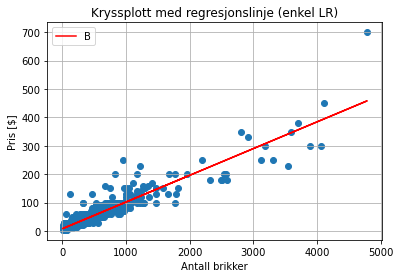

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     3299.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.90e-228
Time:                        21:37:36   Log-Likelihood:                -2423.9
No. Observations:                 526   AIC:                             4852.
Df Residuals:                     524   BIC:                             4860.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8351      1.332      5.881      0.0

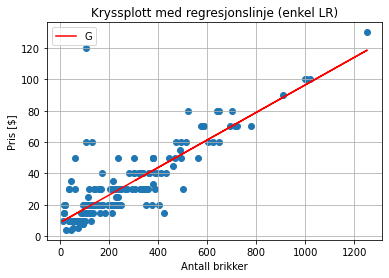

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     438.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.89e-49
Time:                        21:37:36   Log-Likelihood:                -693.39
No. Observations:                 176   AIC:                             1391.
Df Residuals:                     174   BIC:                             1397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6815      1.398      6.209      0.0

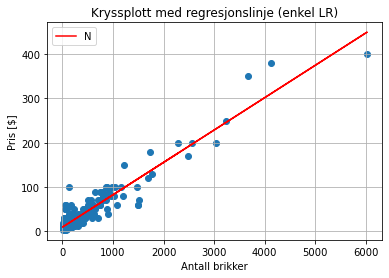

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1848.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.97e-108
Time:                        21:37:36   Log-Likelihood:                -945.64
No. Observations:                 220   AIC:                             1895.
Df Residuals:                     218   BIC:                             1902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8626      1.438      6.858      0.0

In [7]:
gender_groups = df2["Gender"].unique()

# Perform linear regression and create scatter plots with regression lines for each gender group
for gender_group in gender_groups:
    subset_df = df2[df2['Gender'] == gender_group]
    
    modell = smf.ols('Price ~ Pieces', data=subset_df)
    result = modell.fit()

    slope = result.params['Pieces']
    intercept = result.params['Intercept']

    regression_x = np.array(subset_df['Pieces'])
    regression_y = slope * regression_x + intercept

    # Create scatter plot and regression line
    plt.scatter(subset_df['Pieces'], subset_df['Price'], color=plt.cm.tab10(0))
    plt.plot(regression_x, regression_y, color="red", label=gender_group)

    plt.xlabel('Antall brikker')
    plt.ylabel('Pris [$]')
    plt.title('Kryssplott med regresjonslinje (enkel LR)')
    plt.legend()
    plt.grid()

    plt.show()
    print(result.summary())
   

In [5]:
formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()
resultat.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     5415.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:32:58   Log-Likelihood:                -4161.6
No. Observations:                 922   AIC:                             8327.
Df Residuals:                     920   BIC:                             8337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8962      0.894      9.951      0.000       7.142      10.651
Pieces         0.0872      0.001     73.589      0.000       0.085       0.090
==============================================================================
Omnibus:                      736.003   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45431.936
Skew:                           3.115   Prob(JB):                         0.00
Kurtosis:                      36.820   Cond. No.                         927.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

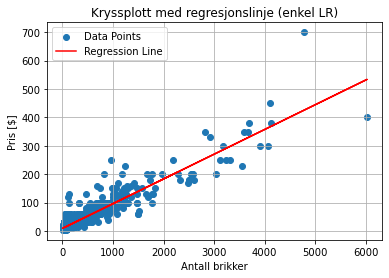

In [6]:
slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

In [37]:
formel = 'Price ~ Unique_Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()
resultat.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     1251.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.14e-173
Time:                        15:11:26   Log-Likelihood:                -4655.4
No. Observations:                 922   AIC:                             9315.
Df Residuals:                     920   BIC:                             9325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.9690      1.971     -3.537      0.000     -10.836      -3.102
Unique_Pieces     0.4000      0.011     35.364      0.000       0.378       0.422
==============================================================================
Omnibus:                     1095.649   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139790.678
Skew:                           5.839   Prob(JB):                         0.00
Kurtosis:                      62.181   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

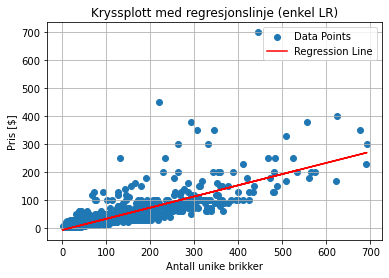

In [38]:
slope = resultat.params['Unique_Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Unique_Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Unique_Pieces'], df2['Price'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall unike brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

In [20]:
modell3_mlr = smf.ols('Price ~ Pieces * Gender', data=df2)
results_mlr = modell3_mlr.fit()
summary_mlr = results_mlr.summary()
summary_mlr



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1211.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:44:40   Log-Likelihood:                -4115.6
No. Observations:                 922   AIC:                             8243.
Df Residuals:                     916   BIC:                             8272.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.8351      1.155      6.786      0.000       5.569      10.101
Gender[T.G]            0.8465      2.623      0.323      0.747      -4.302       5.995
Gender[T.N]            2.0275      2.050      0.989      0.323      -1.997       6.052
Pieces                 0.0941      0.001     66.271      0.000       0.091       0.097
Pieces:Gender[T.G]    -0.0063      0.007     -0.882      0.378      -0.020       0.008
Pieces:Gender[T.N]    -0.0211      0.002     -8.616      0.000      -0.026      -0.016
==============================================================================
Omnibus:                      664.073   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29500.510
Skew:                           2.749   Prob(JB):                         0.00
Kurtosis:                      30.160   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

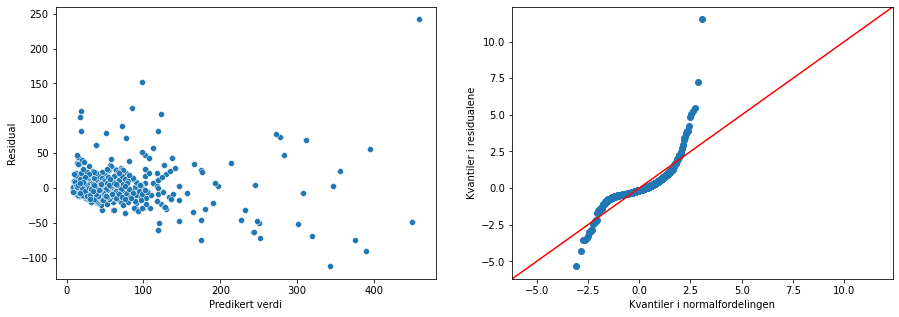

In [21]:
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = results_mlr.fittedvalues, y = results_mlr.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(results_mlr.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [87]:
modell3_mlr = smf.ols('Price ~ Pieces + Gender', data=df2)
results_mlr = modell3_mlr.fit()
summary_mlr = results_mlr.summary()
summary_mlr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1848.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:35:10   Log-Likelihood:                -4151.5
No. Observations:                 922   AIC:                             8311.
Df Residuals:                     918   BIC:                             8330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.3135      1.119     10.110      0.000       9.117      13.510
Gender[T.N]    -7.9468      1.758     -4.521      0.000     -11.396      -4.497
Gender[T.G]    -2.4552      1.928     -1.273      0.203      -6.239       1.329
Pieces          0.0871      0.001     73.348      0.000       0.085       0.089
==============================================================================
Omnibus:                      743.747   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45546.140
Skew:                           3.172   Prob(JB):                         0.00
Kurtosis:                      36.843   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
modell3_mlr = smf.ols('Price ~ Unique_Pieces * Gender', data=df2)
results_mlr = modell3_mlr.fit()
summary_mlr = results_mlr.summary()
summary_mlr

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     267.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.97e-176
Time:                        16:37:50   Log-Likelihood:                -4635.7
No. Observations:                 922   AIC:                             9283.
Df Residuals:                     916   BIC:                             9312.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.1011      2.623     -3.089      0.002     -13.248      -2.954
Gender[T.N]                   2.0492      4.548      0.451      0.652      -6.876      10.975
Gender[T.G]                  11.8350      5.412      2.187      0.029       1.214      22.456
Unique_Pieces                 0.4296      0.014     30.143      0.000       0.402       0.458
Unique_Pieces:Gender[T.N]    -0.0474      0.026     -1.856      0.064      -0.098       0.003
Unique_Pieces:Gender[T.G]    -0.1933      0.037     -5.246      0.000      -0.266      -0.121
==============================================================================
Omnibus:                     1093.356   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           140671.671
Skew:                           5.812   Prob(JB):                         0.00
Kurtosis:                      62.385   Cond. No.                         894.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

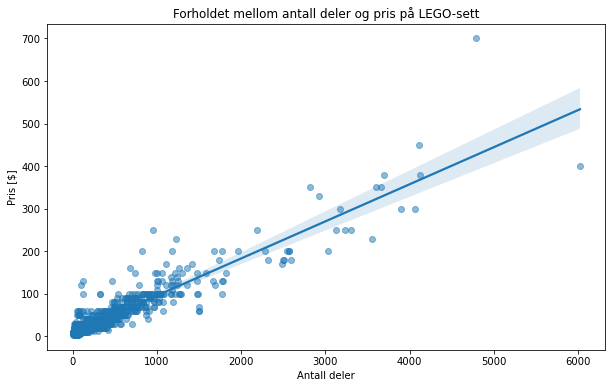

In [17]:
#Regresjonskoeffisienter
beta = 0.0872
alpha = 8.8962
r_squared = 0.855
p_value = 0.000
#Tegner scatterplott med regresjonslinje
plt.figure(figsize=(10, 6))
sns.regplot(x='Pieces', y='Price', data=df2, scatter_kws={'alpha':0.5})

#Tilpasser plottet
plt.title('Forholdet mellom antall deler og pris på LEGO-sett')
plt.xlabel('Antall deler')
plt.ylabel('Pris [$]')

#Viser plottet
plt.show()
